# 实验一 数据探索与预处理

## 1 数据清洗

### 1.1 找出不符合规则的数据并进行修正

In [1]:
import pandas as pd
import numpy as np
import re

# 读取csv
# 中文解码这个我也不知道怎么高效处理，一般试试utf-8再试试gbk，再不行就搜索报错信息...
# 长号码串不读取为数字更好处理
data = pd.read_csv("ex1.csv", encoding='gb18030', dtype={'qq':object, 'tel':object})

In [2]:
# 对空白字符进行处理
# 姓名删除多个空格，仅保留一个（考虑英文名）
data["姓名"].replace("\s+", " ", regex=True, inplace=True)
# 去除空白字符， 部门-职务、教育经历和工作经历为保持格式不去除
data["公司名称"].replace("\s+", "", regex=True, inplace=True)
data["工作内容"].replace("\s+", "", regex=True, inplace=True)
data["email"].replace("\s+", "", regex=True, inplace=True)
data["注册资金"].replace("\s+", "", regex=True, inplace=True)

# 姓名只允许中文英文
data["姓名"].replace("[^\w\u4e00-\u9fff]+", np.NaN, regex=True, inplace=True)

# Tel列只允许合法格式
data["tel"].replace("^[^1[35678]\d{9}$]", np.NaN, regex=True, inplace=True)

# 去除姓名字段为空的行
data.dropna(subset=["姓名"], inplace=True)


In [3]:
data

,是否认证,姓名,部门-职务,公司名称,工作内容,qq,email,tel,公司是否认证,注册资金,公司成立时间,公司年龄,教育经历,工作经历
0,1,陈文才,客户经理,重庆心联宇科技有限公司,NaN,NaN,NaN,NaN,1,200万,2017/1/20,1年,重庆科技学院 1 热能与动力工程 2012-08-01 2016-06-01,重庆心联宇科技有限公司
1,1,黄彬,总部 执行董事,重庆善古堂科技有限公司,NaN,NaN,NaN,NaN,1,100万,2009/5/25,9年,第一军医大学 1 临床医学系 1990-01-01 1993-01-01,重庆善古堂科技有限公司 总部 执行董事 2008-05-01 现在
2,1,李玉萍,短信营销部 销售经理,北京亿美软通科技有限公司广州分公司,短信群发推广，短信验证码,NaN,NaN,NaN,1,NaN,2010/9/27,7年,广东农工商职业技术学院 0 市场营销 2014-09-01 2017-06-01,北京亿美软通科技有限公司广州分公司 短信营销部 销售经理
3,1,黄勇钦,市场部 大客户销售经理,重庆亿邦运输有限责任公司,川渝地区的仓储配送业务以及西南地区网络招商加盟。,NaN,NaN,NaN,1,200万,2009/1/7,9年,NaN,重庆亿邦运输有限责任公司
4,1,王旺,市场部 销售经理,深圳市深米网络科技有限公司,极速上线小程序,NaN,NaN,NaN,1,1000万,2014/5/30,4年,NaN,深圳深米网络科技有限公司
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7479,1,吕斌,总经办 总经理,宁波市众协国际货运代理有限公司,公司整体经营运作,NaN,NaN,NaN,1,500万,2009/2/13,9年,NaN,NaN
7480,1,吉凯凯,360销售事业部 网络运营,北京全时天地在线网络信息股份有限公司,网络运营,NaN,NaN,NaN,1,4500万,2005/12/30,12年,NaN,北京全时天地在线网络信息股份有限公司 360销售事业部 网络运营
7481,1,吴巧龙,置业顾问,北京首开万科房地产开发有限公司,NaN,NaN,NaN,NaN,1,1亿,2013/3/8,5年,河北地质大学 1 工商管理 2011-09-01 2015-06-01,北京首开万科房地产开发有限公司 置业顾问
7482,0,客户经理,客户经理,上海易谷网络科技有限公司,NaN,NaN,NaN,NaN,1,5000万,2008/1/31,10年,NaN,上海易谷网络科技有限公司 大客户经理


### 1.2 根据字段含义将数据处理为合适的格式

In [4]:
# 拆分部门-职务

# 直接拆分成两个新列
d1 = data["部门-职务"].str.split(" ", expand=True)
d1.drop(d1.columns[2:], axis=1, inplace=True)
d1.columns = ["部门", "职务"]

# 删除旧列, 添加新列
data = data.drop("部门-职务", axis=1).join(d1)
data

,是否认证,姓名,公司名称,工作内容,qq,email,tel,公司是否认证,注册资金,公司成立时间,公司年龄,教育经历,工作经历,部门,职务
0,1,陈文才,重庆心联宇科技有限公司,NaN,NaN,NaN,NaN,1,200万,2017/1/20,1年,重庆科技学院 1 热能与动力工程 2012-08-01 2016-06-01,重庆心联宇科技有限公司,,客户经理
1,1,黄彬,重庆善古堂科技有限公司,NaN,NaN,NaN,NaN,1,100万,2009/5/25,9年,第一军医大学 1 临床医学系 1990-01-01 1993-01-01,重庆善古堂科技有限公司 总部 执行董事 2008-05-01 现在,总部,执行董事
2,1,李玉萍,北京亿美软通科技有限公司广州分公司,短信群发推广，短信验证码,NaN,NaN,NaN,1,NaN,2010/9/27,7年,广东农工商职业技术学院 0 市场营销 2014-09-01 2017-06-01,北京亿美软通科技有限公司广州分公司 短信营销部 销售经理,短信营销部,销售经理
3,1,黄勇钦,重庆亿邦运输有限责任公司,川渝地区的仓储配送业务以及西南地区网络招商加盟。,NaN,NaN,NaN,1,200万,2009/1/7,9年,NaN,重庆亿邦运输有限责任公司,市场部,大客户销售经理
4,1,王旺,深圳市深米网络科技有限公司,极速上线小程序,NaN,NaN,NaN,1,1000万,2014/5/30,4年,NaN,深圳深米网络科技有限公司,市场部,销售经理
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7479,1,吕斌,宁波市众协国际货运代理有限公司,公司整体经营运作,NaN,NaN,NaN,1,500万,2009/2/13,9年,NaN,NaN,总经办,总经理
7480,1,吉凯凯,北京全时天地在线网络信息股份有限公司,网络运营,NaN,NaN,NaN,1,4500万,2005/12/30,12年,NaN,北京全时天地在线网络信息股份有限公司 360销售事业部 网络运营,360销售事业部,网络运营
7481,1,吴巧龙,北京首开万科房地产开发有限公司,NaN,NaN,NaN,NaN,1,1亿,2013/3/8,5年,河北地质大学 1 工商管理 2011-09-01 2015-06-01,北京首开万科房地产开发有限公司 置业顾问,,置业顾问
7482,0,客户经理,上海易谷网络科技有限公司,NaN,NaN,NaN,NaN,1,5000万,2008/1/31,10年,NaN,上海易谷网络科技有限公司 大客户经理,,客户经理


In [5]:
# 注册资金转为数值
def to_num(x):
    num = float(re.findall("^\d+\.?\d*", x)[0])
    if x[-1] == '万':
        unit = 10000
    elif x[-1] == '亿':
        unit = 100000000
    else:
        unit = 1
    return num * unit

data["注册资金"] = data["注册资金"].apply(lambda x: np.NaN if x!=x else to_num(x))

data

,是否认证,姓名,公司名称,工作内容,qq,email,tel,公司是否认证,注册资金,公司成立时间,公司年龄,教育经历,工作经历,部门,职务
0,1,陈文才,重庆心联宇科技有限公司,NaN,NaN,NaN,NaN,1,2000000.0,2017/1/20,1年,重庆科技学院 1 热能与动力工程 2012-08-01 2016-06-01,重庆心联宇科技有限公司,,客户经理
1,1,黄彬,重庆善古堂科技有限公司,NaN,NaN,NaN,NaN,1,1000000.0,2009/5/25,9年,第一军医大学 1 临床医学系 1990-01-01 1993-01-01,重庆善古堂科技有限公司 总部 执行董事 2008-05-01 现在,总部,执行董事
2,1,李玉萍,北京亿美软通科技有限公司广州分公司,短信群发推广，短信验证码,NaN,NaN,NaN,1,NaN,2010/9/27,7年,广东农工商职业技术学院 0 市场营销 2014-09-01 2017-06-01,北京亿美软通科技有限公司广州分公司 短信营销部 销售经理,短信营销部,销售经理
3,1,黄勇钦,重庆亿邦运输有限责任公司,川渝地区的仓储配送业务以及西南地区网络招商加盟。,NaN,NaN,NaN,1,2000000.0,2009/1/7,9年,NaN,重庆亿邦运输有限责任公司,市场部,大客户销售经理
4,1,王旺,深圳市深米网络科技有限公司,极速上线小程序,NaN,NaN,NaN,1,10000000.0,2014/5/30,4年,NaN,深圳深米网络科技有限公司,市场部,销售经理
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7479,1,吕斌,宁波市众协国际货运代理有限公司,公司整体经营运作,NaN,NaN,NaN,1,5000000.0,2009/2/13,9年,NaN,NaN,总经办,总经理
7480,1,吉凯凯,北京全时天地在线网络信息股份有限公司,网络运营,NaN,NaN,NaN,1,45000000.0,2005/12/30,12年,NaN,北京全时天地在线网络信息股份有限公司 360销售事业部 网络运营,360销售事业部,网络运营
7481,1,吴巧龙,北京首开万科房地产开发有限公司,NaN,NaN,NaN,NaN,1,100000000.0,2013/3/8,5年,河北地质大学 1 工商管理 2011-09-01 2015-06-01,北京首开万科房地产开发有限公司 置业顾问,,置业顾问
7482,0,客户经理,上海易谷网络科技有限公司,NaN,NaN,NaN,NaN,1,50000000.0,2008/1/31,10年,NaN,上海易谷网络科技有限公司 大客户经理,,客户经理


In [6]:
# 公司成立时间转为yyyy-mm-dd格式
data["公司成立时间"] = data["公司成立时间"].apply(lambda x: np.NaN if x == "未公示" else pd.to_datetime(x, format='%Y-%m-%d'))

# 公司年龄转数值
data["公司年龄"] = data["公司年龄"].apply(lambda x: np.NaN if x!=x else 0 if x == "不足一年" else int(re.findall("\d+\.?\d*", x)[0]))

data

,是否认证,姓名,公司名称,工作内容,qq,email,tel,公司是否认证,注册资金,公司成立时间,公司年龄,教育经历,工作经历,部门,职务
0,1,陈文才,重庆心联宇科技有限公司,NaN,NaN,NaN,NaN,1,2000000.0,2017-01-20,1.0,重庆科技学院 1 热能与动力工程 2012-08-01 2016-06-01,重庆心联宇科技有限公司,,客户经理
1,1,黄彬,重庆善古堂科技有限公司,NaN,NaN,NaN,NaN,1,1000000.0,2009-05-25,9.0,第一军医大学 1 临床医学系 1990-01-01 1993-01-01,重庆善古堂科技有限公司 总部 执行董事 2008-05-01 现在,总部,执行董事
2,1,李玉萍,北京亿美软通科技有限公司广州分公司,短信群发推广，短信验证码,NaN,NaN,NaN,1,NaN,2010-09-27,7.0,广东农工商职业技术学院 0 市场营销 2014-09-01 2017-06-01,北京亿美软通科技有限公司广州分公司 短信营销部 销售经理,短信营销部,销售经理
3,1,黄勇钦,重庆亿邦运输有限责任公司,川渝地区的仓储配送业务以及西南地区网络招商加盟。,NaN,NaN,NaN,1,2000000.0,2009-01-07,9.0,NaN,重庆亿邦运输有限责任公司,市场部,大客户销售经理
4,1,王旺,深圳市深米网络科技有限公司,极速上线小程序,NaN,NaN,NaN,1,10000000.0,2014-05-30,4.0,NaN,深圳深米网络科技有限公司,市场部,销售经理
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7479,1,吕斌,宁波市众协国际货运代理有限公司,公司整体经营运作,NaN,NaN,NaN,1,5000000.0,2009-02-13,9.0,NaN,NaN,总经办,总经理
7480,1,吉凯凯,北京全时天地在线网络信息股份有限公司,网络运营,NaN,NaN,NaN,1,45000000.0,2005-12-30,12.0,NaN,北京全时天地在线网络信息股份有限公司 360销售事业部 网络运营,360销售事业部,网络运营
7481,1,吴巧龙,北京首开万科房地产开发有限公司,NaN,NaN,NaN,NaN,1,100000000.0,2013-03-08,5.0,河北地质大学 1 工商管理 2011-09-01 2015-06-01,北京首开万科房地产开发有限公司 置业顾问,,置业顾问
7482,0,客户经理,上海易谷网络科技有限公司,NaN,NaN,NaN,NaN,1,50000000.0,2008-01-31,10.0,NaN,上海易谷网络科技有限公司 大客户经理,,客户经理


In [7]:
# 教育经历拆分
# 拆分为 学校 是否本科 入学时间 毕业时间
d2 = data["教育经历"].str.split(" ", expand=True)
d2.drop(d2.columns[5:], axis=1, inplace=True)
d2.columns = ["学校", "是否本科", "专业", "入学时间", "毕业时间"]
data = data.drop("教育经历", axis=1).join(d2)

data

,是否认证,姓名,公司名称,工作内容,qq,email,tel,公司是否认证,注册资金,公司成立时间,公司年龄,工作经历,部门,职务,学校,是否本科,专业,入学时间,毕业时间
0,1,陈文才,重庆心联宇科技有限公司,NaN,NaN,NaN,NaN,1,2000000.0,2017-01-20,1.0,重庆心联宇科技有限公司,,客户经理,重庆科技学院,1,热能与动力工程,2012-08-01,2016-06-01
1,1,黄彬,重庆善古堂科技有限公司,NaN,NaN,NaN,NaN,1,1000000.0,2009-05-25,9.0,重庆善古堂科技有限公司 总部 执行董事 2008-05-01 现在,总部,执行董事,第一军医大学,1,临床医学系,1990-01-01,1993-01-01
2,1,李玉萍,北京亿美软通科技有限公司广州分公司,短信群发推广，短信验证码,NaN,NaN,NaN,1,NaN,2010-09-27,7.0,北京亿美软通科技有限公司广州分公司 短信营销部 销售经理,短信营销部,销售经理,广东农工商职业技术学院,0,市场营销,2014-09-01,2017-06-01
3,1,黄勇钦,重庆亿邦运输有限责任公司,川渝地区的仓储配送业务以及西南地区网络招商加盟。,NaN,NaN,NaN,1,2000000.0,2009-01-07,9.0,重庆亿邦运输有限责任公司,市场部,大客户销售经理,NaN,NaN,NaN,NaN,NaN
4,1,王旺,深圳市深米网络科技有限公司,极速上线小程序,NaN,NaN,NaN,1,10000000.0,2014-05-30,4.0,深圳深米网络科技有限公司,市场部,销售经理,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7479,1,吕斌,宁波市众协国际货运代理有限公司,公司整体经营运作,NaN,NaN,NaN,1,5000000.0,2009-02-13,9.0,NaN,总经办,总经理,NaN,NaN,NaN,NaN,NaN
7480,1,吉凯凯,北京全时天地在线网络信息股份有限公司,网络运营,NaN,NaN,NaN,1,45000000.0,2005-12-30,12.0,北京全时天地在线网络信息股份有限公司 360销售事业部 网络运营,360销售事业部,网络运营,NaN,NaN,NaN,NaN,NaN
7481,1,吴巧龙,北京首开万科房地产开发有限公司,NaN,NaN,NaN,NaN,1,100000000.0,2013-03-08,5.0,北京首开万科房地产开发有限公司 置业顾问,,置业顾问,河北地质大学,1,工商管理,2011-09-01,2015-06-01
7482,0,客户经理,上海易谷网络科技有限公司,NaN,NaN,NaN,NaN,1,50000000.0,2008-01-31,10.0,上海易谷网络科技有限公司 大客户经理,,客户经理,NaN,NaN,NaN,NaN,NaN


In [8]:
# 工作经历拆分
# 拆分为 曾属公司 曾属部门 曾任职位 入职时间 离职时间
d3 = data["工作经历"].str.split(" ", expand=True)
d3.drop(d3.columns[5:], axis=1, inplace=True)
d3.columns = ["曾属公司", "曾属部门", "曾任职位", "入职时间", "离职时间"]
data = data.drop("工作经历", axis=1).join(d3)

data

,是否认证,姓名,公司名称,工作内容,qq,email,tel,公司是否认证,注册资金,公司成立时间,...,学校,是否本科,专业,入学时间,毕业时间,曾属公司,曾属部门,曾任职位,入职时间,离职时间
0,1,陈文才,重庆心联宇科技有限公司,NaN,NaN,NaN,NaN,1,2000000.0,2017-01-20,...,重庆科技学院,1,热能与动力工程,2012-08-01,2016-06-01,重庆心联宇科技有限公司,,,,None
1,1,黄彬,重庆善古堂科技有限公司,NaN,NaN,NaN,NaN,1,1000000.0,2009-05-25,...,第一军医大学,1,临床医学系,1990-01-01,1993-01-01,重庆善古堂科技有限公司,总部,执行董事,2008-05-01,现在
2,1,李玉萍,北京亿美软通科技有限公司广州分公司,短信群发推广，短信验证码,NaN,NaN,NaN,1,NaN,2010-09-27,...,广东农工商职业技术学院,0,市场营销,2014-09-01,2017-06-01,北京亿美软通科技有限公司广州分公司,短信营销部,销售经理,,
3,1,黄勇钦,重庆亿邦运输有限责任公司,川渝地区的仓储配送业务以及西南地区网络招商加盟。,NaN,NaN,NaN,1,2000000.0,2009-01-07,...,NaN,NaN,NaN,NaN,NaN,重庆亿邦运输有限责任公司,,,,None
4,1,王旺,深圳市深米网络科技有限公司,极速上线小程序,NaN,NaN,NaN,1,10000000.0,2014-05-30,...,NaN,NaN,NaN,NaN,NaN,深圳深米网络科技有限公司,,,,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7479,1,吕斌,宁波市众协国际货运代理有限公司,公司整体经营运作,NaN,NaN,NaN,1,5000000.0,2009-02-13,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7480,1,吉凯凯,北京全时天地在线网络信息股份有限公司,网络运营,NaN,NaN,NaN,1,45000000.0,2005-12-30,...,NaN,NaN,NaN,NaN,NaN,北京全时天地在线网络信息股份有限公司,360销售事业部,网络运营,,
7481,1,吴巧龙,北京首开万科房地产开发有限公司,NaN,NaN,NaN,NaN,1,100000000.0,2013-03-08,...,河北地质大学,1,工商管理,2011-09-01,2015-06-01,北京首开万科房地产开发有限公司,,置业顾问,,
7482,0,客户经理,上海易谷网络科技有限公司,NaN,NaN,NaN,NaN,1,50000000.0,2008-01-31,...,NaN,NaN,NaN,NaN,NaN,上海易谷网络科技有限公司,,大客户经理,,


### 1.3	进行数据概化

In [9]:
# 职务等级划分
def job_level(job):
    job = str(job)
    if job.find("董事")!= -1 or job.find("主席")!= -1:
        return "A"
    elif job.find("总经理")!= -1 or job.find("总裁")!= -1:
        return "B"
    elif job.find("总监")!= -1 or job.find("经理")!= -1 or job.find("主任")!= -1 or job.find("主管")!= -1:
        return "C"
    elif job.find("工程师")!= -1 or job.find("员")!= -1 or job.find("实习生")!= -1:
        return "D"
    else:
        return "E"
    
d4 = data["职务"].apply(lambda x: np.NaN if x!=x else job_level(x))
d4 = d4.to_frame(name="职务等级")
data = data.join(d4)

data

,是否认证,姓名,公司名称,工作内容,qq,email,tel,公司是否认证,注册资金,公司成立时间,...,是否本科,专业,入学时间,毕业时间,曾属公司,曾属部门,曾任职位,入职时间,离职时间,职务等级
0,1,陈文才,重庆心联宇科技有限公司,NaN,NaN,NaN,NaN,1,2000000.0,2017-01-20,...,1,热能与动力工程,2012-08-01,2016-06-01,重庆心联宇科技有限公司,,,,None,C
1,1,黄彬,重庆善古堂科技有限公司,NaN,NaN,NaN,NaN,1,1000000.0,2009-05-25,...,1,临床医学系,1990-01-01,1993-01-01,重庆善古堂科技有限公司,总部,执行董事,2008-05-01,现在,A
2,1,李玉萍,北京亿美软通科技有限公司广州分公司,短信群发推广，短信验证码,NaN,NaN,NaN,1,NaN,2010-09-27,...,0,市场营销,2014-09-01,2017-06-01,北京亿美软通科技有限公司广州分公司,短信营销部,销售经理,,,C
3,1,黄勇钦,重庆亿邦运输有限责任公司,川渝地区的仓储配送业务以及西南地区网络招商加盟。,NaN,NaN,NaN,1,2000000.0,2009-01-07,...,NaN,NaN,NaN,NaN,重庆亿邦运输有限责任公司,,,,None,C
4,1,王旺,深圳市深米网络科技有限公司,极速上线小程序,NaN,NaN,NaN,1,10000000.0,2014-05-30,...,NaN,NaN,NaN,NaN,深圳深米网络科技有限公司,,,,None,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7479,1,吕斌,宁波市众协国际货运代理有限公司,公司整体经营运作,NaN,NaN,NaN,1,5000000.0,2009-02-13,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B
7480,1,吉凯凯,北京全时天地在线网络信息股份有限公司,网络运营,NaN,NaN,NaN,1,45000000.0,2005-12-30,...,NaN,NaN,NaN,NaN,北京全时天地在线网络信息股份有限公司,360销售事业部,网络运营,,,E
7481,1,吴巧龙,北京首开万科房地产开发有限公司,NaN,NaN,NaN,NaN,1,100000000.0,2013-03-08,...,1,工商管理,2011-09-01,2015-06-01,北京首开万科房地产开发有限公司,,置业顾问,,,E
7482,0,客户经理,上海易谷网络科技有限公司,NaN,NaN,NaN,NaN,1,50000000.0,2008-01-31,...,NaN,NaN,NaN,NaN,上海易谷网络科技有限公司,,大客户经理,,,C


In [10]:
# 工作类别划分
def job_kind(job):
    job = str(job)
    if job.find("销售")!= -1 or job.find("市场")!= -1 or job.find("客户")!= -1:
        return "市场类"
    elif job.find("业务")!= -1 or job.find("技术")!= -1 or job.find("项目")!= -1 or job.find("执行")!= -1:
        return "技术类"
    elif job.find("营销")!= -1 or job.find("宣传")!= -1  or job.find("商务")!= -1:
        return "营销类"
    else:
        return "其他类"
    
d5 = data["职务"].apply(lambda x: np.NaN if x!=x else job_kind(x))
d5 = d5.to_frame(name="工作类别")
data = data.join(d5)

data

,是否认证,姓名,公司名称,工作内容,qq,email,tel,公司是否认证,注册资金,公司成立时间,...,专业,入学时间,毕业时间,曾属公司,曾属部门,曾任职位,入职时间,离职时间,职务等级,工作类别
0,1,陈文才,重庆心联宇科技有限公司,NaN,NaN,NaN,NaN,1,2000000.0,2017-01-20,...,热能与动力工程,2012-08-01,2016-06-01,重庆心联宇科技有限公司,,,,None,C,市场类
1,1,黄彬,重庆善古堂科技有限公司,NaN,NaN,NaN,NaN,1,1000000.0,2009-05-25,...,临床医学系,1990-01-01,1993-01-01,重庆善古堂科技有限公司,总部,执行董事,2008-05-01,现在,A,技术类
2,1,李玉萍,北京亿美软通科技有限公司广州分公司,短信群发推广，短信验证码,NaN,NaN,NaN,1,NaN,2010-09-27,...,市场营销,2014-09-01,2017-06-01,北京亿美软通科技有限公司广州分公司,短信营销部,销售经理,,,C,市场类
3,1,黄勇钦,重庆亿邦运输有限责任公司,川渝地区的仓储配送业务以及西南地区网络招商加盟。,NaN,NaN,NaN,1,2000000.0,2009-01-07,...,NaN,NaN,NaN,重庆亿邦运输有限责任公司,,,,None,C,市场类
4,1,王旺,深圳市深米网络科技有限公司,极速上线小程序,NaN,NaN,NaN,1,10000000.0,2014-05-30,...,NaN,NaN,NaN,深圳深米网络科技有限公司,,,,None,C,市场类
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7479,1,吕斌,宁波市众协国际货运代理有限公司,公司整体经营运作,NaN,NaN,NaN,1,5000000.0,2009-02-13,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B,其他类
7480,1,吉凯凯,北京全时天地在线网络信息股份有限公司,网络运营,NaN,NaN,NaN,1,45000000.0,2005-12-30,...,NaN,NaN,NaN,北京全时天地在线网络信息股份有限公司,360销售事业部,网络运营,,,E,其他类
7481,1,吴巧龙,北京首开万科房地产开发有限公司,NaN,NaN,NaN,NaN,1,100000000.0,2013-03-08,...,工商管理,2011-09-01,2015-06-01,北京首开万科房地产开发有限公司,,置业顾问,,,E,其他类
7482,0,客户经理,上海易谷网络科技有限公司,NaN,NaN,NaN,NaN,1,50000000.0,2008-01-31,...,NaN,NaN,NaN,上海易谷网络科技有限公司,,大客户经理,,,C,市场类


In [11]:
# 公司领域划分
def company_kind(c):
    c = str(c)
    if c.find("科技")!= -1 or c.find("软件")!= -1 or c.find("计算机")!= -1 or c.find("技术")!= -1:
        return "科技类"
    elif c.find("文化")!= -1 or c.find("传媒")!= -1 or c.find("广告")!= -1:
        return "文化传媒类"
    elif c.find("咨询")!= -1:
        return "咨询类"
    elif c.find("管理")!= -1:
        return "管理类"
    elif c.find("贸")!= -1:
        return "贸易类"
    elif c.find("服务")!= -1:
        return "服务类"
    else:
        return "其他类"
    
d6 = data["公司名称"].apply(lambda x: np.NaN if x!=x else company_kind(x))
d6 = d6.to_frame(name="公司领域")
data = data.join(d6)

data

,是否认证,姓名,公司名称,工作内容,qq,email,tel,公司是否认证,注册资金,公司成立时间,...,入学时间,毕业时间,曾属公司,曾属部门,曾任职位,入职时间,离职时间,职务等级,工作类别,公司领域
0,1,陈文才,重庆心联宇科技有限公司,NaN,NaN,NaN,NaN,1,2000000.0,2017-01-20,...,2012-08-01,2016-06-01,重庆心联宇科技有限公司,,,,None,C,市场类,科技类
1,1,黄彬,重庆善古堂科技有限公司,NaN,NaN,NaN,NaN,1,1000000.0,2009-05-25,...,1990-01-01,1993-01-01,重庆善古堂科技有限公司,总部,执行董事,2008-05-01,现在,A,技术类,科技类
2,1,李玉萍,北京亿美软通科技有限公司广州分公司,短信群发推广，短信验证码,NaN,NaN,NaN,1,NaN,2010-09-27,...,2014-09-01,2017-06-01,北京亿美软通科技有限公司广州分公司,短信营销部,销售经理,,,C,市场类,科技类
3,1,黄勇钦,重庆亿邦运输有限责任公司,川渝地区的仓储配送业务以及西南地区网络招商加盟。,NaN,NaN,NaN,1,2000000.0,2009-01-07,...,NaN,NaN,重庆亿邦运输有限责任公司,,,,None,C,市场类,其他类
4,1,王旺,深圳市深米网络科技有限公司,极速上线小程序,NaN,NaN,NaN,1,10000000.0,2014-05-30,...,NaN,NaN,深圳深米网络科技有限公司,,,,None,C,市场类,科技类
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7479,1,吕斌,宁波市众协国际货运代理有限公司,公司整体经营运作,NaN,NaN,NaN,1,5000000.0,2009-02-13,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B,其他类,其他类
7480,1,吉凯凯,北京全时天地在线网络信息股份有限公司,网络运营,NaN,NaN,NaN,1,45000000.0,2005-12-30,...,NaN,NaN,北京全时天地在线网络信息股份有限公司,360销售事业部,网络运营,,,E,其他类,其他类
7481,1,吴巧龙,北京首开万科房地产开发有限公司,NaN,NaN,NaN,NaN,1,100000000.0,2013-03-08,...,2011-09-01,2015-06-01,北京首开万科房地产开发有限公司,,置业顾问,,,E,其他类,其他类
7482,0,客户经理,上海易谷网络科技有限公司,NaN,NaN,NaN,NaN,1,50000000.0,2008-01-31,...,NaN,NaN,上海易谷网络科技有限公司,,大客户经理,,,C,市场类,科技类


In [13]:
# 注册资金等级划分
def money_level(num):
    if num < 10000000:
        return "1000万以下"
    elif num < 50000000:
        return "1000万以上5000万以下"
    elif num < 100000000:
        return "5000万以上1亿以下"
    else:
        return "1亿以上"
    
d7 = data["注册资金"].apply(lambda x: np.NaN if x!=x else money_level(x))
d7 = d7.to_frame(name="注册资金等级")
data = data.join(d7)

data

,是否认证,姓名,公司名称,工作内容,qq,email,tel,公司是否认证,注册资金,公司成立时间,...,毕业时间,曾属公司,曾属部门,曾任职位,入职时间,离职时间,职务等级,工作类别,公司领域,注册资金等级
0,1,陈文才,重庆心联宇科技有限公司,NaN,NaN,NaN,NaN,1,2000000.0,2017-01-20,...,2016-06-01,重庆心联宇科技有限公司,,,,None,C,市场类,科技类,1000万以下
1,1,黄彬,重庆善古堂科技有限公司,NaN,NaN,NaN,NaN,1,1000000.0,2009-05-25,...,1993-01-01,重庆善古堂科技有限公司,总部,执行董事,2008-05-01,现在,A,技术类,科技类,1000万以下
2,1,李玉萍,北京亿美软通科技有限公司广州分公司,短信群发推广，短信验证码,NaN,NaN,NaN,1,NaN,2010-09-27,...,2017-06-01,北京亿美软通科技有限公司广州分公司,短信营销部,销售经理,,,C,市场类,科技类,NaN
3,1,黄勇钦,重庆亿邦运输有限责任公司,川渝地区的仓储配送业务以及西南地区网络招商加盟。,NaN,NaN,NaN,1,2000000.0,2009-01-07,...,NaN,重庆亿邦运输有限责任公司,,,,None,C,市场类,其他类,1000万以下
4,1,王旺,深圳市深米网络科技有限公司,极速上线小程序,NaN,NaN,NaN,1,10000000.0,2014-05-30,...,NaN,深圳深米网络科技有限公司,,,,None,C,市场类,科技类,1000万以上5000万以下
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7479,1,吕斌,宁波市众协国际货运代理有限公司,公司整体经营运作,NaN,NaN,NaN,1,5000000.0,2009-02-13,...,NaN,NaN,NaN,NaN,NaN,NaN,B,其他类,其他类,1000万以下
7480,1,吉凯凯,北京全时天地在线网络信息股份有限公司,网络运营,NaN,NaN,NaN,1,45000000.0,2005-12-30,...,NaN,北京全时天地在线网络信息股份有限公司,360销售事业部,网络运营,,,E,其他类,其他类,1000万以上5000万以下
7481,1,吴巧龙,北京首开万科房地产开发有限公司,NaN,NaN,NaN,NaN,1,100000000.0,2013-03-08,...,2015-06-01,北京首开万科房地产开发有限公司,,置业顾问,,,E,其他类,其他类,1亿以上
7482,0,客户经理,上海易谷网络科技有限公司,NaN,NaN,NaN,NaN,1,50000000.0,2008-01-31,...,NaN,上海易谷网络科技有限公司,,大客户经理,,,C,市场类,科技类,5000万以上1亿以下


## 2 数据可视化

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

### 2.1 按照数据类型进行图表展示

<AxesSubplot:xlabel='职务等级', ylabel='count'>

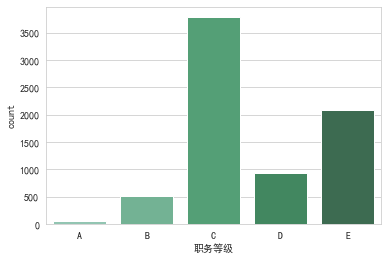

In [15]:
# 职务等级
sns.set_palette(sns.color_palette("BuGn_d"))
sns.set_style('whitegrid',{'font.sans-serif':['simhei','Arial']}) 
sns.countplot(x="职务等级", data=data, order=['A','B','C','D','E'])

<AxesSubplot:xlabel='工作类别', ylabel='count'>

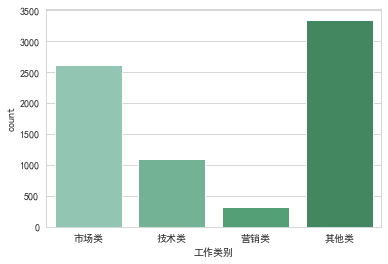

In [16]:
# 工作类别
sns.countplot(x="工作类别", data=data)

<AxesSubplot:xlabel='公司领域', ylabel='count'>

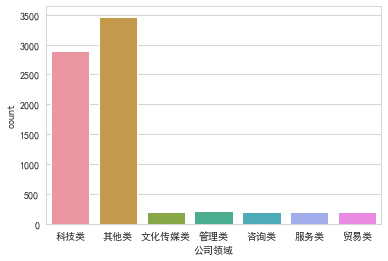

In [17]:
# 公司领域
sns.countplot(x="公司领域", data=data)

<AxesSubplot:xlabel='公司年龄', ylabel='count'>

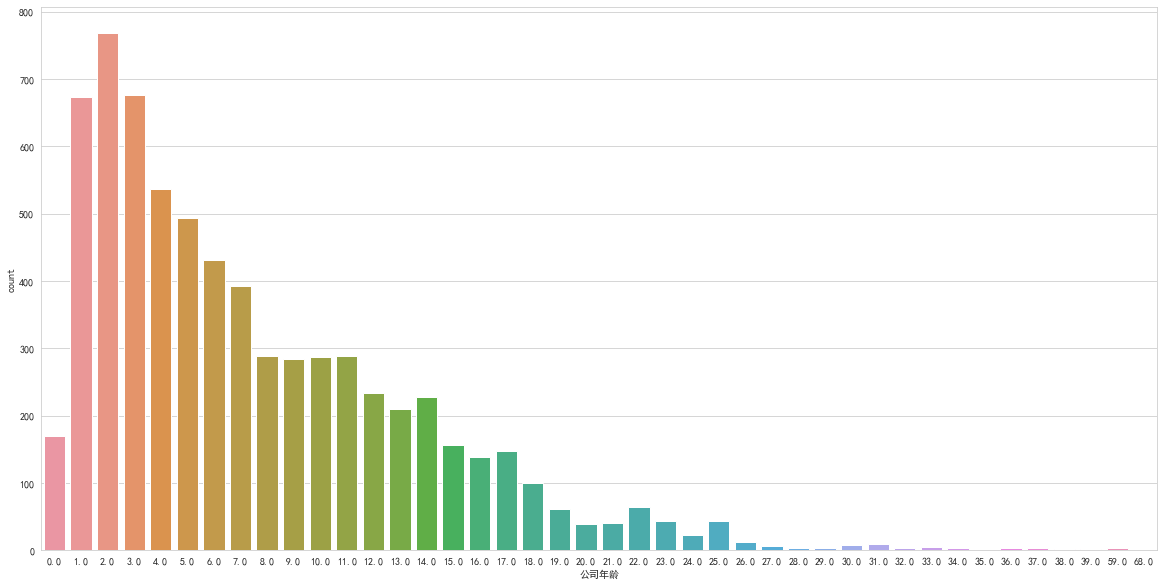

In [32]:
# 公司年龄
plt.figure(figsize=(20, 10))
sns.countplot(x="公司年龄", data=data.sort_values(by="公司年龄", ascending=True))

### 2.2 相关分析

<AxesSubplot:>

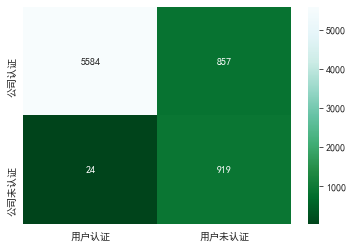

In [52]:
# 用户是否认证和公司是否认证
a = data[(data["是否认证"] == 1) & (data["公司是否认证"]== 1)].shape[0]
b = data[(data["是否认证"] == 0) & (data["公司是否认证"]== 1)].shape[0]
c = data[(data["是否认证"] == 1) & (data["公司是否认证"]== 0)].shape[0]
d = data[(data["是否认证"] == 0) & (data["公司是否认证"]== 0)].shape[0]

df = pd.DataFrame([[a,b],[c,d]], columns=["用户认证","用户未认证"], index =["公司认证","公司未认证"])
sns.heatmap(df, cmap='BuGn_r',annot=True, fmt='.20g')

(0.0, 1000000000.0)

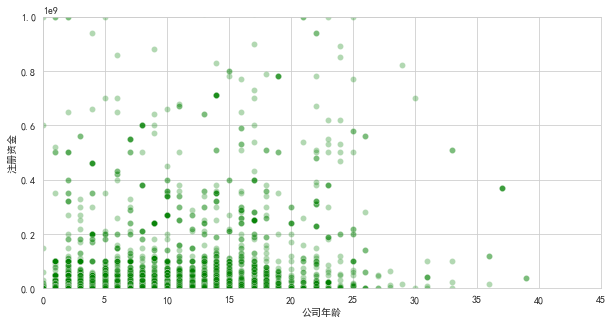

In [79]:
# 注册资金与公司年龄
plt.figure(figsize=(10, 5))
p = sns.scatterplot(x="公司年龄", y="注册资金", data=data, alpha=0.3, color='g')
p.set_xlim(0,45)
p.set_ylim(0,1000000000)

### 2.3 对比分析

<AxesSubplot:xlabel='职务等级', ylabel='count'>

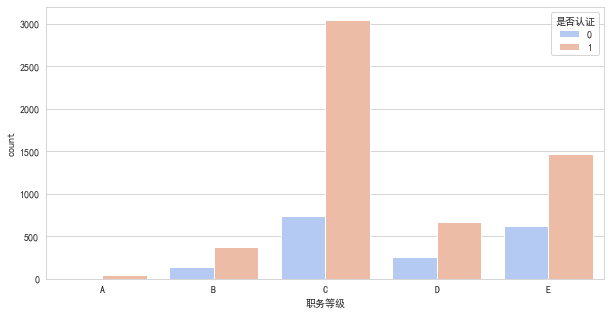

In [87]:
# 认证用户与非认证用户职务分布
plt.figure(figsize=(10, 5))
sns.countplot(x="职务等级", hue="是否认证", data=data, palette='coolwarm', order=['A','B','C','D','E'])

<AxesSubplot:xlabel='注册资金等级', ylabel='count'>

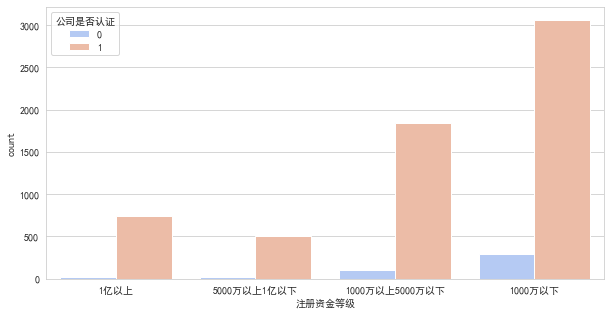

In [88]:
# 认证公司与非认证公司资金差异
plt.figure(figsize=(10, 5))
sns.countplot(x="注册资金等级", hue="公司是否认证", data=data, palette='coolwarm', order=['1亿以上','5000万以上1亿以下','1000万以上5000万以下','1000万以下'])

(0.0, 30.0)

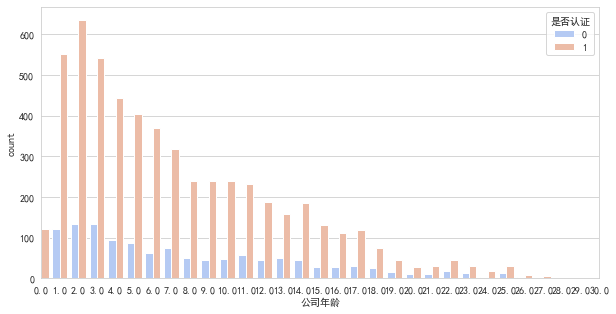

In [96]:
# 认证公司与非认证公司年龄差异
plt.figure(figsize=(10, 5))
p = sns.countplot(x="公司年龄", hue="是否认证", data=data.sort_values(by="公司年龄", ascending=True), palette='coolwarm')
p.set_xlim(0,30)


## 3 思考

### 3.1 数据隐私保护